<a href="https://colab.research.google.com/github/zomorodiyan/MAE-5093/blob/main/CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#@title define exact, Euler, LaxWendroff, rungeKutta methods
def exactSol(x,t,a):
    return (np.sin(2*np.pi*(x-a*t)))

def Euler(u, nx, c):
    
    un = np.copy(u)
    for i in range(nx, 0, -1):
        u[i] = un[i] - c * (un[i] - un[i-1])
    u[0] = u[nx]
    return u


def LaxWendroff(u, nx, c):

    un = np.copy(u)
    i = nx
    u[i] = un[i] - 0.5 * c * (un[0] - un[i-1]) + 0.5 * (c**2) * (un[0] - 2 * un[i] + un[i-1])
    for i in range(nx-1, 0, -1):
        u[i] = un[i] - 0.5 * c * (un[i+1] - un[i-1]) + 0.5 * (c**2) * (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = u[nx]
    return u


def rungeKutta(u, nx, c):
    
    un = np.copy(u)
    u1, u2 = map(np.zeros_like, (u, u))
    
    for i in range(nx-1, -1, -1):
        u1[i] = un[i] - 0.5 * c * (un[i+1] - un[i-1])
    i = nx
    u1[i] = un[i] - 0.5 * c * (un[0] - un[i-1])

    for i in range(nx-1, -1, -1):        
        u2[i] = 0.75 * un[i] + 0.25 * u1[i] - 0.125 * c * (u1[i+1] - u1[i-1])
    i = nx
    u2[i] = 0.75 * un[i] + 0.25 * u1[i] - 0.125 * c * (u1[0] - u1[i-1])

    for i in range(nx-1, -1, -1):
        u[i] = (un[i] + 2 * u2[i] - c * (u2[i+1] - u2[i-1])) / 3 
    i = nx
    u[i] = (un[i] + 2 * u2[i] - c * (u2[0] - u2[i-1])) / 3 

    return u

In [14]:
#@title define plot method
def plot(plotTitle, label1, label2, label3, label4, x, y1, y2, y3, y4):
    plt.figure()
    plt.plot(x, y4, '*', label=label4)
    plt.plot(x, y1, label=label1)
    plt.plot(x, y2, label=label2)
    plt.plot(x, y3, label=label3)
    plt.title(plotTitle)
    plt.xlabel('t')
    plt.ylabel('v')
    plt.legend()

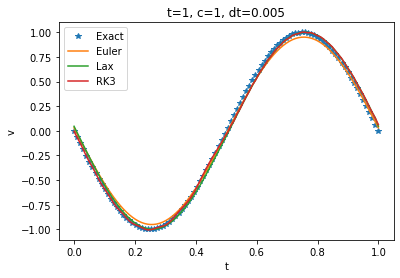

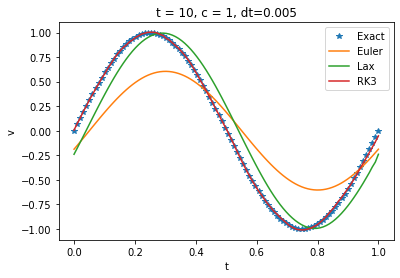

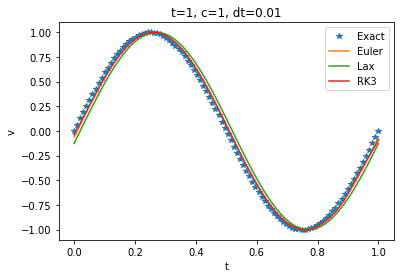

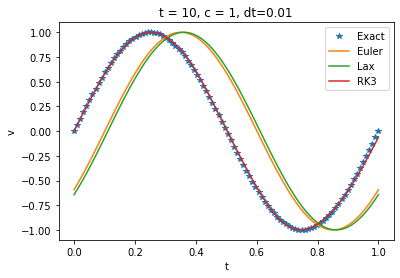

In [19]:
#@title part (i) & (ii)
a = 1.0; tmax = 10; Lx = 1; nx = 99; hx = Lx/(nx+1)
htz = [0.005,0.01]
for ht in htz:
  nt = int(tmax / ht) + 1
  x = np.linspace(0, Lx, nx+1)
  c = a * ht / hx
  u0 = np.sin(2*np.pi*x)
  
  uEuler, uLax, uRK3 = map(np.copy, (u0, u0, u0))
  u2DEuler, u2DLax, u2DRK3, uExact = map(np.zeros, ((nt+1, nx+1), (nt+1, nx+1), (nt+1, nx+1), (nt+1, nx+1)))
  u2DEuler[0], u2DLax[0], u2DRK3[0] = map(np.copy, (u0, u0, u0))
  
  for n in range(nt):
      uEuler = Euler(uEuler, nx, c)
      uLax = LaxWendroff(uLax, nx, c)
      uRK3 = rungeKutta(uRK3, nx, c)
      u2DEuler[n+1] = uEuler
      u2DLax[n] = uLax
      u2DRK3[n] = uRK3
  
  time = np.arange(0, tmax+ht/10, ht)
  for n in range(nt):
      uExact[n] = exactSol(x,time[n],a)
  
  plotTitle = 't=1, c=1'
  if ht == 0.01:
    plotTitle+= ', dt=0.01'
  else:
    plotTitle+= ', dt=0.005'
  label1 = 'Euler'
  label2 = 'Lax'
  label3 = 'RK3'
  label4 = 'Exact'
  ind = 100
  plot(plotTitle, label1, label2, label3, label4, x, u2DEuler[ind], u2DLax[ind], u2DRK3[ind], uExact[ind])
  
  plotTitle = 't = 10, c = 1'
  if ht == 0.01:
    plotTitle+= ', dt=0.01'
  else:
    plotTitle+= ', dt=0.005'
  ind = 1000
  plot(plotTitle, label1, label2, label3, label4, x, u2DEuler[ind], u2DLax[ind], u2DRK3[ind], uExact[ind])